##06. 군집알고리즘

In [1]:
#과일 사진 데이터 준비하기 

!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-08-11 13:47:06--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-08-11 13:47:06--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-08-11 13:47:07--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

In [2]:
#넘파이, 맷플롯립 패키지 import 

import numpy as np
import matplotlib.pyplot as plt

In [3]:
#넘파이에서 npy파일을 로드

fruits = np.load('fruits_300.npy')

In [4]:
#fruits 배열의 크기를 확인

print(fruits.shape)

(300, 100, 100)


300 : 샘플의 개수

100 : 이미지의 높이

100 : 이미지 너비 

이미지 크기는 100 x 100

-> 각 픽셀은 넘파이 배열의 원하나에 대응

즉, 배열의 크기가 100 x 100 

In [5]:
#첫 번째 이미지의 첫 번째 행을 출력 

print(fruits[0, 0, :])

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


첫 번째 행에 있는 픽셀 100개에 들어 있는 값을 출력하였음 

이 넘파이 배열은 흑백 사진을 가지고 있어서 0~255까지의 정숫값을 가진다. 

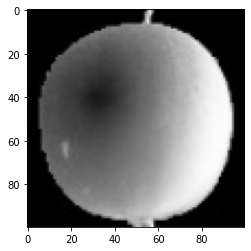

In [6]:
#맷플롯립의 imshow()로 넘파이 배열로 저장된 이미지를 그려보기 
#흑백이미지이므로 cmap를 'gray'로 지정 

plt.imshow(fruits[0], cmap='gray')
plt.show()

0에 가까울 수록 검은색 값이 나타나고 높은 값은 밝게 표시된다. 



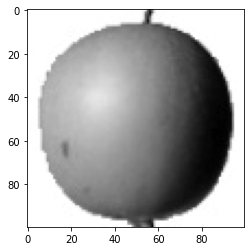

In [7]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

밝은 부분이 0에 가깝고 짙은 부분이 255에 가까운 값이다.

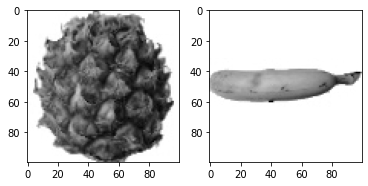

In [8]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100], cmap='gray_r') #파인애플 이미지
axs[1].imshow(fruits[200], cmap='gray_r') #바나나 이미지
plt.show()

맷플롯립의 subplots()함수를 사용하면 여러 개의 그래프를 배열처럼 쌓을 수 있도록 도와줌 

subplot()함수의 두 매개변수는 그래프를 쌓을 행과 열을 지정한다 

변환된 axs는 2개의 서브 그래프를 담고 있는 배열이다.

In [9]:
#100x100 이미지를 펼쳐 길이가 10,000인 1차원 배열로 만들기 

apple = fruits[0:100].reshape(-1, 100*100)
pineapple= fruits[100:200].reshape(-1, 100*100)
banana= fruits[200:300].reshape(-1, 100*100)

In [10]:
#apple, pineapple, banana배열의 크기는 (!00,10000)입니다. 

print(apple.shape)
print(pineapple.shape)
print(banana.shape)

(100, 10000)
(100, 10000)
(100, 10000)


In [11]:
#사과 샘플 100개에 대한 픽셀 평균값을 계산하였음 

print(apple.mean(axis =1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


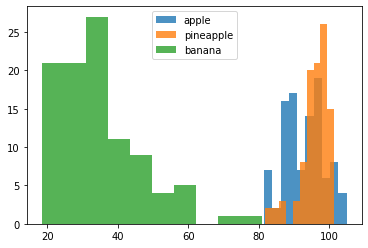

In [12]:
#히스토그램 그려서 확인해보기 
#alpha를 1보다 작게하여 그래프 투명도 조절
plt.hist(np.mean(apple,axis=1), alpha=0.8)
plt.hist(np.mean(pineapple,axis=1), alpha=0.8)
plt.hist(np.mean(banana,axis=1), alpha=0.8)
plt.legend(['apple','pineapple','banana'])
plt.show()

바나나의 사진의 평균값은 40 아래에 집중, 사과와 파인애플은 90~100사이에 많이 모여있음 

바나나는 픽셀 평균값만으로도 사과, 파인애플과 확실히 구분되지만 바나나는 차지하는 영역이 작기에 평균값 작음 

사과와 파인애플은 많이 겹쳐 있어서 픽셀값만으로는 구분하기 쉽지않음 
-> 대체로 형태가 동그랗고 사진에서 차지하는 크기도 비슷하다 

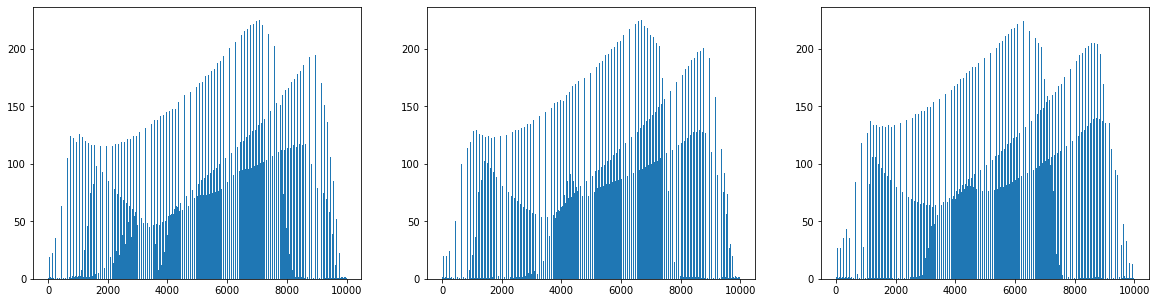

In [13]:
#픽셀의 평균을 계산 
fig, axs = plt.subplots(1,3, figsize =(20,5))
axs[0].bar(range(10000),np.mean(apple,axis=0))
axs[1].bar(range(10000),np.mean(apple,axis=0))
axs[2].bar(range(10000),np.mean(apple,axis=0))
plt.show()

사과 , 파인애플 , 바나나의 그래프

3개의 그래프를 보면 과일마다 값이 높은 구간이 다르다. 

사과는 사진 아래쪽으로 갈수록 값이 높아지고,

파인애플 그래프는 비교적 고르면서 높고, 

바나나는 확실히 중앙의 픽셀값이 높다 


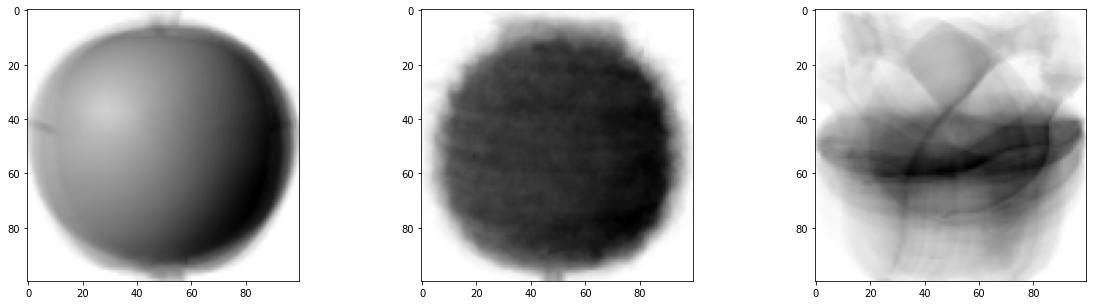

In [14]:
apple_mean = np.mean(apple,axis=0).reshape(100,100)
pineapple_mean= np.mean(pineapple, axis=0).reshape(100,100)
banana_mean= np.mean(banana, axis=0).reshape(100,100)
fig, axs = plt.subplots(1,3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

평균값인 apple_mean과 가장 가까운 값을 골라보기-> 절댓값 오차를 사용

In [15]:
#fruits 배열에 있는 모든 샘플에서 apple_mean을 뺀 절댓값의 평균을 계산 
abs_diff= np.abs(fruits - apple_mean)
print(abs_diff)
#abs_diff이 (300,100,100)크기의 배열
#각 샘플에 대한 평균을 구하기 위해 2,3 차원을 지정 
abs_mean= np.mean(abs_diff, axis=(1,2))
#abs_mean은 각 샘플의 오차 평균 (300,)인 1차원 배열 
print(abs_mean.shape)

(300,)


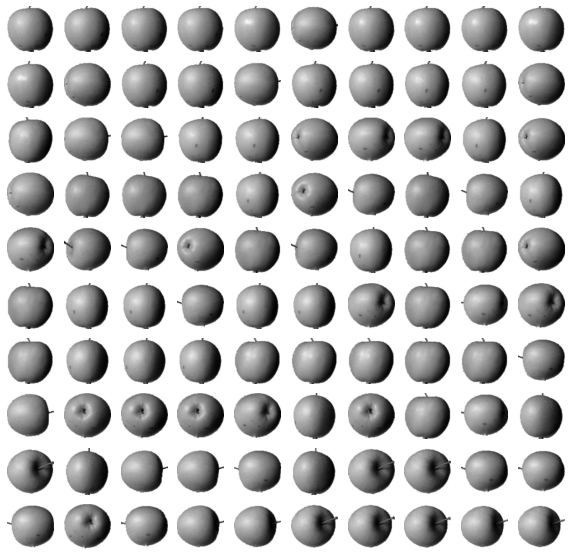

In [17]:
#apple_mean고 오차가 가장 작은 샘플 100개 고르기 
#argsort() , 작은 것에서 큰 순서로 나열한 abs_mean 배열의 인덱스 반환 
#이 인덱스 중 처음 100개 선택, 10x10격자로 이룸 
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10,10, figsize=(10,10))

#2중 for문을 돌면서 10개의 행, 열의 이미지 출력 
for i in range(10):
  for j in range(10):
    #axs는 (10,10)의 2차원 배열  
    axs[i, j].imshow(fruits[apple_index[i*10 +j]], cmap='gray_r')
    #axis로 좌표축 off 
    axs[i, j].axis('off')
plt.show()

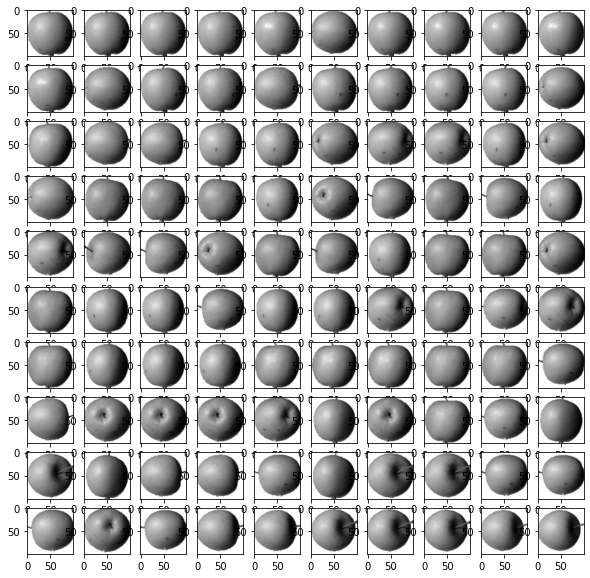

In [18]:
# axis = on 
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10,10, figsize=(10,10))

for i in range(10):
  for j in range(10): 
    axs[i, j].imshow(fruits[apple_index[i*10 +j]], cmap='gray_r') 
    axs[i, j].axis('on')
plt.show()